# Learning Scikit-learn: Machine Learning in Python

## Notebook for Chapter 2: Supervised Learning - Estimating Boston house pricing using Linear Regression

In [3]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


We want to solve a *regression* problem (we want to approximate a real function)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Import the Boston House Pricing Dataset

In [13]:
import numpy as np
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california = fetch_california_housing()

# Print the shape of the data
print("Data shape:", california.data.shape)

# Print feature names
print("Feature names:", california.feature_names)

# Print the maximum, minimum, and mean of the target values
print("Max target:", np.max(california.target))
print("Min target:", np.min(california.target))
print("Mean target:", np.mean(california.target))

# Print the description of the dataset
print(california.DESCR)


Data shape: (20640, 8)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Max target: 5.00001
Min target: 0.14999
Mean target: 2.068558169089147
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://w

In [19]:
import numpy as np
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california = fetch_california_housing()

# Print the first data point
print("First data point:", california.data[0])

# Print the maximum, minimum, and mean of the data values
print("Max data value:", np.max(california.data))
print("Min data value:", np.min(california.data))
print("Mean data value:", np.mean(california.data))


First data point: [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
Max data value: 35682.0
Min data value: -124.35
Mean data value: 172.9556735813799


Separate train and test

In [21]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the California housing dataset
california = fetch_california_housing()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.25, random_state=33)

# Print the shape of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (15480, 8)
X_test shape: (5160, 8)
y_train shape: (15480,)
y_test shape: (5160,)


Find the most important features

[(True, 'MedInc'), (True, 'HouseAge'), (True, 'AveRooms'), (False, 'AveBedrms'), (False, 'Population'), (False, 'AveOccup'), (True, 'Latitude'), (True, 'Longitude')]


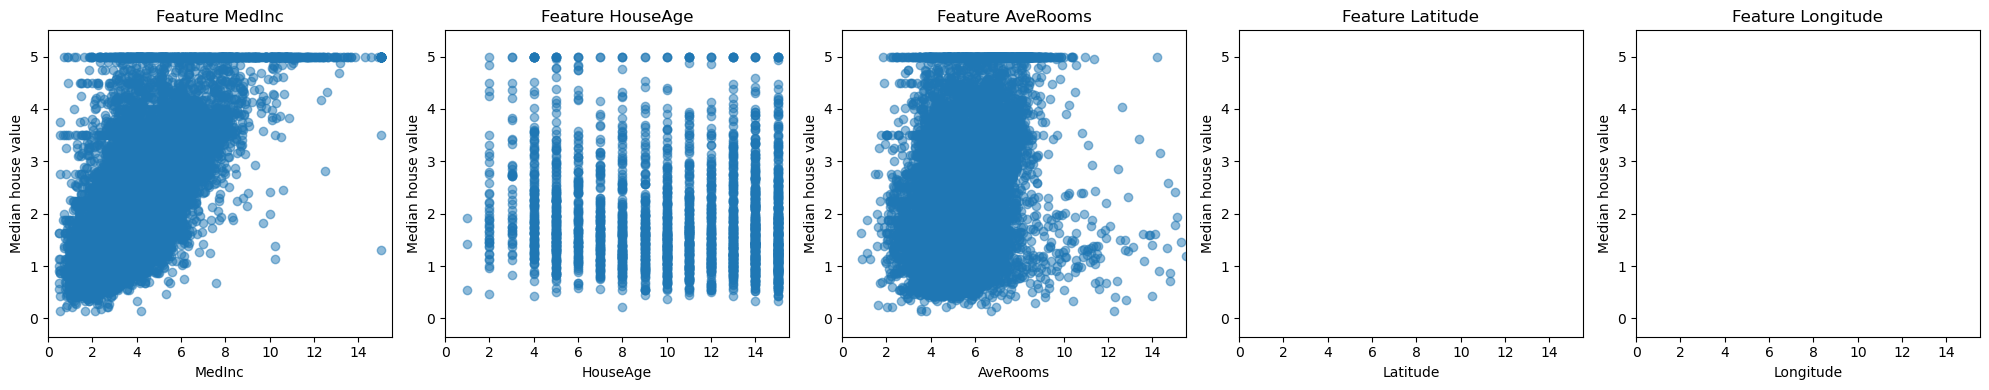

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the California housing dataset
california = fetch_california_housing()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.25, random_state=33)

# Feature selection
fs = SelectKBest(score_func=f_regression, k=5)
X_new = fs.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = fs.get_support(indices=True)

# Get the names of the selected features
selected_features = [california.feature_names[i] for i in selected_feature_indices]
print(list(zip(fs.get_support(), california.feature_names)))

# Plot the selected features
x_min, x_max = X_new[:, 0].min() - 0.5, X_new[:, 0].max() + 0.5
y_min, y_max = y_train.min() - 0.5, y_train.max() + 0.5

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    axes[i].set_aspect('auto')
    axes[i].set_title('Feature ' + selected_features[i])
    axes[i].set_xlabel(selected_features[i])
    axes[i].set_ylabel('Median house value')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    axes[i].scatter(X_new[:, i], y_train, alpha=0.5)

plt.tight_layout()
plt.show()



Normalize data

In [34]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the California housing dataset
california = fetch_california_housing()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.25, random_state=33)

# Standardize the features
scalerX = StandardScaler().fit(X_train)

X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)

print(np.max(X_train), np.min(X_train), np.mean(X_train))


103.54588948844986 -2.398726054135132 -5.938453863019424e-14


Start with a lineal model, SGDRegressor, that tries to find the hyperplane that minimizes a certain loss function (typically, the sum of squared distances from each instance to the hyperplane). It uses Stochastic Gradient Descent to find the minimum. 

In [39]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

def train_and_evaluate(clf, X_train, y_train):
    # Fit the classifier on the training set
    clf.fit(X_train, y_train)
    
    # Print the coefficient of determination on the training set
    print("Coefficient of determination on training set:", clf.score(X_train, y_train))
    
    # Create a k-fold cross-validation iterator of k=5 folds
    cv = KFold(n_splits=5, shuffle=True, random_state=33)
    
    # Perform cross-validation and calculate scores
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    
    # Print the average coefficient of determination using 5-fold cross-validation
    print("Average coefficient of determination using 5-fold cross-validation:", np.mean(scores))

# Example usage
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the California housing dataset
california = fetch_california_housing()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.25, random_state=33)

# Initialize the classifier
clf = LinearRegression()

# Train and evaluate the classifier
train_and_evaluate(clf, X_train, y_train)


Coefficient of determination on training set: 0.5987322242957205
Average coefficient of determination using 5-fold cross-validation: 0.5938465323916675


In [49]:
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import numpy as np

# Load the California housing dataset
california = fetch_california_housing()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.25, random_state=33)

# Standardize the features
scalerX = StandardScaler().fit(X_train)
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)

# Standardize the target
scalerY = StandardScaler().fit(y_train.reshape(-1, 1))
y_train = scalerY.transform(y_train.reshape(-1, 1)).flatten()
y_test = scalerY.transform(y_test.reshape(-1, 1)).flatten()

def train_and_evaluate(clf, X_train, y_train):
    # Fit the classifier on the training set
    clf.fit(X_train, y_train)
    
    # Print the coefficient of determination on the training set
    print("Coefficient of determination on training set:", clf.score(X_train, y_train))
    
    # Create a k-fold cross-validation iterator of k=5 folds
    cv = KFold(n_splits=5, shuffle=True, random_state=33)
    
    # Perform cross-validation and calculate scores
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    
    # Print the average coefficient of determination using 5-fold cross-validation
    print("Average coefficient of determination using 5-fold cross-validation:", np.mean(scores))

# Initialize the classifier
clf_sgd = linear_model.SGDRegressor(loss='squared_error', penalty=None, random_state=42)

# Train and evaluate the classifier
train_and_evaluate(clf_sgd, X_train, y_train)

# Print the coefficients
print("Coefficients:", clf_sgd.coef_)


Coefficient of determination on training set: 0.5968505954066061
Average coefficient of determination using 5-fold cross-validation: -1099.3710276684665
Coefficients: [ 0.70543009  0.09583679 -0.22321116  0.29196788 -0.010125   -0.06254392
 -0.78665854 -0.76859842]


In [53]:
# Initialize the classifier with L2 regularization and squared error loss
clf_sgd1 = linear_model.SGDRegressor(loss='squared_error', penalty='l2', random_state=42)

# Train and evaluate the classifier
train_and_evaluate(clf_sgd1, X_train, y_train)

# Print the coefficients
print("Coefficients:", clf_sgd1.coef_)

Coefficient of determination on training set: 0.5968502422916859
Average coefficient of determination using 5-fold cross-validation: -1084.7323639889232
Coefficients: [ 0.70538445  0.09596119 -0.22299541  0.29165332 -0.01008723 -0.06258183
 -0.78551376 -0.76745844]


In [57]:
# Initialize the classifier with L1 regularization and squared error loss
clf_sgd2 = linear_model.SGDRegressor(loss='squared_error', penalty='l1', random_state=42)

# Train and evaluate the classifier
train_and_evaluate(clf_sgd2, X_train, y_train)

# Print the coefficients
print("Coefficients:", clf_sgd2.coef_)

Coefficient of determination on training set: 0.5968427791612686
Average coefficient of determination using 5-fold cross-validation: -1092.9778181547094
Coefficients: [ 0.70480997  0.09590971 -0.2216907   0.29037459 -0.00924278 -0.06286439
 -0.78573    -0.76769752]


In [59]:
# Initialize the classifier with ElasticNet regularization and squared error loss
clf_sgd3 = linear_model.SGDRegressor(loss='squared_error', penalty='elasticnet', random_state=42)

# Train and evaluate the classifier
train_and_evaluate(clf_sgd3, X_train, y_train)

# Print the coefficients
print("Coefficients:", clf_sgd3.coef_)

Coefficient of determination on training set: 0.596859421183861
Average coefficient of determination using 5-fold cross-validation: -1085.9941395139454
Coefficients: [ 0.70528823  0.09595986 -0.22280871  0.29148069 -0.00943874 -0.06250749
 -0.78551599 -0.76752098]


Ridge regression

In [63]:
clf_ridge = linear_model.Ridge()
train_and_evaluate(clf_ridge,X_train,y_train)

Coefficient of determination on training set: 0.5987321451032398
Average coefficient of determination using 5-fold cross-validation: 0.5938547659550523


SVR

In [68]:
from sklearn import svm
clf_svr= svm.SVR(kernel='linear')
train_and_evaluate(clf_svr,X_train,y_train)

Coefficient of determination on training set: 0.4790826539084523
Average coefficient of determination using 5-fold cross-validation: -0.18558792064574306


In [70]:
clf_svr_poly= svm.SVR(kernel='poly')
train_and_evaluate(clf_svr_poly,X_train,y_train)

Coefficient of determination on training set: 0.45474480944662177
Average coefficient of determination using 5-fold cross-validation: -434.2010378780862


In [72]:
clf_svr_rbf= svm.SVR(kernel='rbf')
train_and_evaluate(clf_svr_rbf,X_train,y_train)

Coefficient of determination on training set: 0.7419458237674834
Average coefficient of determination using 5-fold cross-validation: 0.7279717349447762


In [76]:
clf_svr_poly2= svm.SVR(kernel='poly',degree=2)
train_and_evaluate(clf_svr_poly2,X_train,y_train)

Coefficient of determination on training set: 0.1373762722244979
Average coefficient of determination using 5-fold cross-validation: -21.284653195638843


Finally, let's try again Random Forests, in their Extra Trees, and Regression version

In [79]:
from sklearn import ensemble
clf_et=ensemble.ExtraTreesRegressor(n_estimators=10,random_state=42)
train_and_evaluate(clf_et,X_train,y_train)

Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold cross-validation: 0.7851839261960564


In [94]:
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
california = fetch_california_housing()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.25, random_state=33)

# Standardize the features
scalerX = StandardScaler().fit(X_train)
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)

# Initialize the ExtraTreesRegressor
clf_et = ExtraTreesRegressor(random_state=42)

# Fit the model
clf_et.fit(X_train, y_train)

# Get feature importances and feature names
feature_importances = clf_et.feature_importances_
feature_names = california.feature_names

# Zip the feature importances and feature names together and sort them
sorted_features = sorted(zip(feature_importances, feature_names), key=lambda x: x[0], reverse=True)

# Print the sorted feature importances
for importance, name in sorted_features:
    print(f"{name}: {importance:.4f}")


MedInc: 0.4874
Longitude: 0.1136
AveOccup: 0.1129
Latitude: 0.1026
HouseAge: 0.0705
AveRooms: 0.0476
AveBedrms: 0.0364
Population: 0.0290


Finally, evaluate our classifiers on the testing set

In [92]:
from sklearn import metrics

def measure_performance(X, y, clf, show_r2_score=True, show_mae=True, show_mse=True):
    y_pred = clf.predict(X)    
    if show_r2_score:
        print("Coefficient of determination (R²): {0:.3f}".format(metrics.r2_score(y, y_pred)), "\n")  
    if show_mae:
        print("Mean Absolute Error (MAE): {0:.3f}".format(metrics.mean_absolute_error(y, y_pred)), "\n")  
    if show_mse:
        print("Mean Squared Error (MSE): {0:.3f}".format(metrics.mean_squared_error(y, y_pred)), "\n")
# Measure performance on the test set
measure_performance(X_test, y_test, clf_et, show_r2_score=True, show_mae=True, show_mse=True)




Coefficient of determination (R²): 0.828 

Mean Absolute Error (MAE): 0.321 

Mean Squared Error (MSE): 0.233 

